Saving NYC_Airbnb.csv to NYC_Airbnb (6).csv

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895

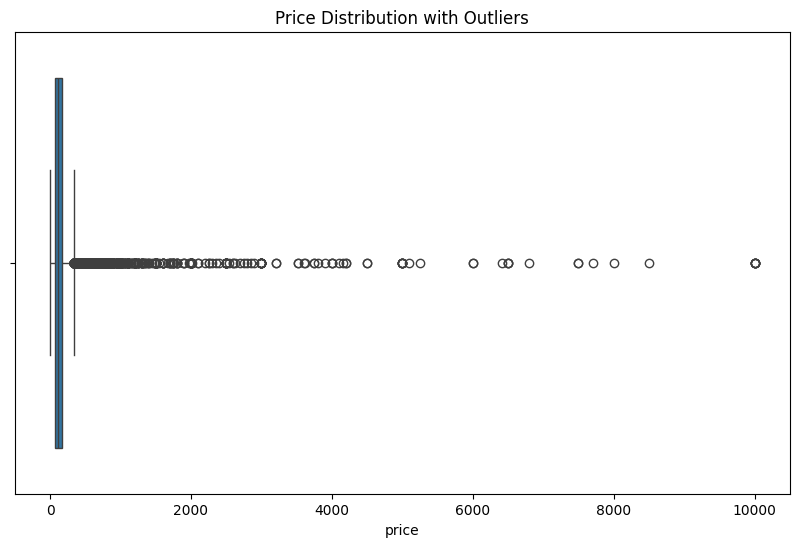


Cleaned Data:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.210000,6.0,365.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.380000,2.0,355.0
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,2019-06-23,1.373221,1.0,365.0
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.640000,1.0,194.0
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.100000,1.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('NYC_Airbnb.csv')

df.head()

print("\nData Info:")
df.info()

print("\nMissing Data:")
missing_data = df.isnull().sum()
print(missing_data)

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

print("\nData after imputation:")
print(df.isnull().sum())

print("\nDuplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

print("\nData after removing duplicates:")
print(df.duplicated().sum())

df.columns = df.columns.str.lower()

plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title('Price Distribution with Outliers')
plt.show()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("\nCleaned Data:")
df.head()